# Classic Models - Customer Orders - KMeans

## 1. Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

import os
from google.colab import drive

from collections import Counter
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler

## 2. Data Preprocessing and Visualization

### 2.1. Load Data

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Change directory to project folder
os.chdir(r'/content/drive/My Drive/Colab Notebooks/ClassicModels/data/ML')
# List contents of project folder
!ls

CM-AvgPriceNum.csv  CM-AvgPriceOrdNum.csv  CM-CredLimit.csv  CM-OrderShipped.csv


In [4]:
try:
  # Load dataframe (df) into appropriate format
  df = pd.read_csv('CM-AvgPriceNum.csv', encoding='utf-8')
  # Remove unnamed columns identified by (;)
  # df = df.loc[:, ~df.columns.str.match('^Unnamed')]
  print("Success!")
except:
  print("Cannot load data. Please try again.")

Success!


### 2.2. Analyze Data

In [5]:
df

,orderNumber,orderLineNumber,productLine,productCode,productName,productScale,buyPrice,MSRP,quantityOrdered,priceEach,orderDate,requiredDate,shippedDate,OrderStatus,daysEarly
0,10100,3,Vintage Cars,S18_1749,1917 Grand Touring Sedan,1:18,86.70,170.00,30,136.00,2003-01-06,2003-01-13,2003-01-10,Shipped,3
1,10100,2,Vintage Cars,S18_2248,1911 Ford Town Car,1:18,33.30,60.54,50,55.09,2003-01-06,2003-01-13,2003-01-10,Shipped,3
2,10100,4,Vintage Cars,S18_4409,1932 Alfa Romeo 8C2300 Spider Sport,1:18,43.26,92.03,22,75.46,2003-01-06,2003-01-13,2003-01-10,Shipped,3
3,10100,1,Vintage Cars,S24_3969,1936 Mercedes Benz 500k Roadster,1:24,21.75,41.03,49,35.29,2003-01-06,2003-01-13,2003-01-10,Shipped,3
4,10101,4,Vintage Cars,S18_2325,1932 Model A Ford J-Coupe,1:18,58.48,127.13,25,108.06,2003-01-09,2003-01-18,2003-01-11,Shipped,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2813,10419,6,Classic Cars,S18_3232,1992 Ferrari 360 Spider red,1:18,77.90,169.34,35,165.95,2005-05-17,2005-05-28,2005-05-19,Shipped,9
2814,10419,3,Classic Cars,S18_3685,1948 Porsche Type 356 Roadster,1:18,62.16,141.28,43,114.44,2005-05-17,2005-05-28,2005-05-19,Shipped,9
2815,10419,7,Classic Cars,S24_2972,1982 Lamborghini Diablo,1:24,16.24,37.76,15,32.10,2005-05-17,2005-05-28,2005-05-19,Shipped,9
2816,10419,12,Classic Cars,S24_3371,1971 Alpine Renault 1600s,1:24,38.58,61.23,55,52.66,2005-05-17,2005-05-28,2005-05-19,Shipped,9


In [6]:
# Brief info about dataframe - non-null values and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2818 entries, 0 to 2817
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   orderNumber      2818 non-null   int64  
 1   orderLineNumber  2818 non-null   int64  
 2   productLine      2818 non-null   object 
 3   productCode      2818 non-null   object 
 4   productName      2818 non-null   object 
 5   productScale     2818 non-null   object 
 6   buyPrice         2818 non-null   float64
 7   MSRP             2818 non-null   float64
 8   quantityOrdered  2818 non-null   int64  
 9   priceEach        2818 non-null   float64
 10  orderDate        2818 non-null   object 
 11  requiredDate     2818 non-null   object 
 12  shippedDate      2818 non-null   object 
 13  OrderStatus      2818 non-null   object 
 14  daysEarly        2818 non-null   int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 330.4+ KB


In [7]:
# Check for missing values
df.isnull().sum()

orderNumber        0
orderLineNumber    0
productLine        0
productCode        0
productName        0
productScale       0
buyPrice           0
MSRP               0
quantityOrdered    0
priceEach          0
orderDate          0
requiredDate       0
shippedDate        0
OrderStatus        0
daysEarly          0
dtype: int64

In [8]:
# # -- Drop/impute missing data (if required) --

# # Drop rows with missing values
# df = df.dropna(axis=0, how='any')

# # ['mean', 'median', 'most_frequent', 'constant']
# imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')
# imputer.fit_transform(df)
# df = imputer.transform(df)

# df.isnull().sum()

In [9]:
# Dataframe statistics on quantitative (numerical) values
df.describe()

,orderNumber,orderLineNumber,buyPrice,MSRP,quantityOrdered,priceEach,daysEarly
count,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000,2818.000000
mean,10255.964159,6.435770,54.587427,101.079503,35.060681,90.881011,10.821150
std,90.529895,4.207979,22.176560,40.252732,9.493428,36.791754,27.521611
min,10100.000000,1.000000,15.910000,33.190000,6.000000,26.550000,-195.000000
25%,10178.000000,3.000000,34.170000,68.790000,27.000000,61.707500,3.000000
50%,10259.000000,6.000000,53.930000,99.210000,34.000000,86.150000,5.000000
75%,10332.000000,9.000000,68.990000,124.440000,43.000000,114.710000,7.000000
max,10419.000000,18.000000,103.420000,214.300000,97.000000,214.300000,81.000000


### 2.2.1. Remove Data Anomalies

In [10]:
# Remove data entries with daysEarly < 0
df = df.drop(df[df.daysEarly < 0].index)

df

,orderNumber,orderLineNumber,productLine,productCode,productName,productScale,buyPrice,MSRP,quantityOrdered,priceEach,orderDate,requiredDate,shippedDate,OrderStatus,daysEarly
0,10100,3,Vintage Cars,S18_1749,1917 Grand Touring Sedan,1:18,86.70,170.00,30,136.00,2003-01-06,2003-01-13,2003-01-10,Shipped,3
1,10100,2,Vintage Cars,S18_2248,1911 Ford Town Car,1:18,33.30,60.54,50,55.09,2003-01-06,2003-01-13,2003-01-10,Shipped,3
2,10100,4,Vintage Cars,S18_4409,1932 Alfa Romeo 8C2300 Spider Sport,1:18,43.26,92.03,22,75.46,2003-01-06,2003-01-13,2003-01-10,Shipped,3
3,10100,1,Vintage Cars,S24_3969,1936 Mercedes Benz 500k Roadster,1:24,21.75,41.03,49,35.29,2003-01-06,2003-01-13,2003-01-10,Shipped,3
4,10101,4,Vintage Cars,S18_2325,1932 Model A Ford J-Coupe,1:18,58.48,127.13,25,108.06,2003-01-09,2003-01-18,2003-01-11,Shipped,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2813,10419,6,Classic Cars,S18_3232,1992 Ferrari 360 Spider red,1:18,77.90,169.34,35,165.95,2005-05-17,2005-05-28,2005-05-19,Shipped,9
2814,10419,3,Classic Cars,S18_3685,1948 Porsche Type 356 Roadster,1:18,62.16,141.28,43,114.44,2005-05-17,2005-05-28,2005-05-19,Shipped,9
2815,10419,7,Classic Cars,S24_2972,1982 Lamborghini Diablo,1:24,16.24,37.76,15,32.10,2005-05-17,2005-05-28,2005-05-19,Shipped,9
2816,10419,12,Classic Cars,S24_3371,1971 Alpine Renault 1600s,1:24,38.58,61.23,55,52.66,2005-05-17,2005-05-28,2005-05-19,Shipped,9


In [11]:
df.describe()

,orderNumber,orderLineNumber,buyPrice,MSRP,quantityOrdered,priceEach,daysEarly
count,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000,2800.000000
mean,10256.548929,6.416071,54.545479,101.000286,35.046786,90.824196,12.144286
std,90.525206,4.193697,22.138036,40.183202,9.493400,36.758268,22.093711
min,10100.000000,1.000000,15.910000,33.190000,6.000000,26.550000,0.000000
25%,10180.000000,3.000000,34.170000,68.790000,27.000000,61.730000,3.000000
50%,10261.000000,6.000000,53.930000,99.210000,34.000000,86.140000,5.000000
75%,10332.000000,9.000000,68.990000,124.440000,43.000000,114.650000,7.000000
max,10419.000000,18.000000,103.420000,214.300000,97.000000,214.300000,81.000000


In [12]:
# Get values for matrix of features (X)
X = df.iloc[:, [0, 1, 6, 7, 8, 9, 13, 14]].values

print(X.shape)

(2800, 8)


In [13]:
X[:10, :]

array([[10100, 3, 86.7, 170.0, 30, 136.0, 'Shipped', 3],
       [10100, 2, 33.3, 60.54, 50, 55.09, 'Shipped', 3],
       [10100, 4, 43.26, 92.03, 22, 75.46, 'Shipped', 3],
       [10100, 1, 21.75, 41.03, 49, 35.29, 'Shipped', 3],
       [10101, 4, 58.48, 127.13, 25, 108.06, 'Shipped', 7],
       [10101, 1, 72.56, 168.75, 26, 167.06, 'Shipped', 7],
       [10101, 3, 22.57, 33.19, 45, 32.53, 'Shipped', 7],
       [10101, 2, 20.61, 44.8, 46, 44.35, 'Shipped', 7],
       [10102, 2, 60.62, 102.74, 39, 95.55, 'Shipped', 4],
       [10102, 1, 24.26, 53.91, 41, 43.13, 'Shipped', 4]], dtype=object)

### 2.3. Visualize Data

#### Pairwise Relationships between Features

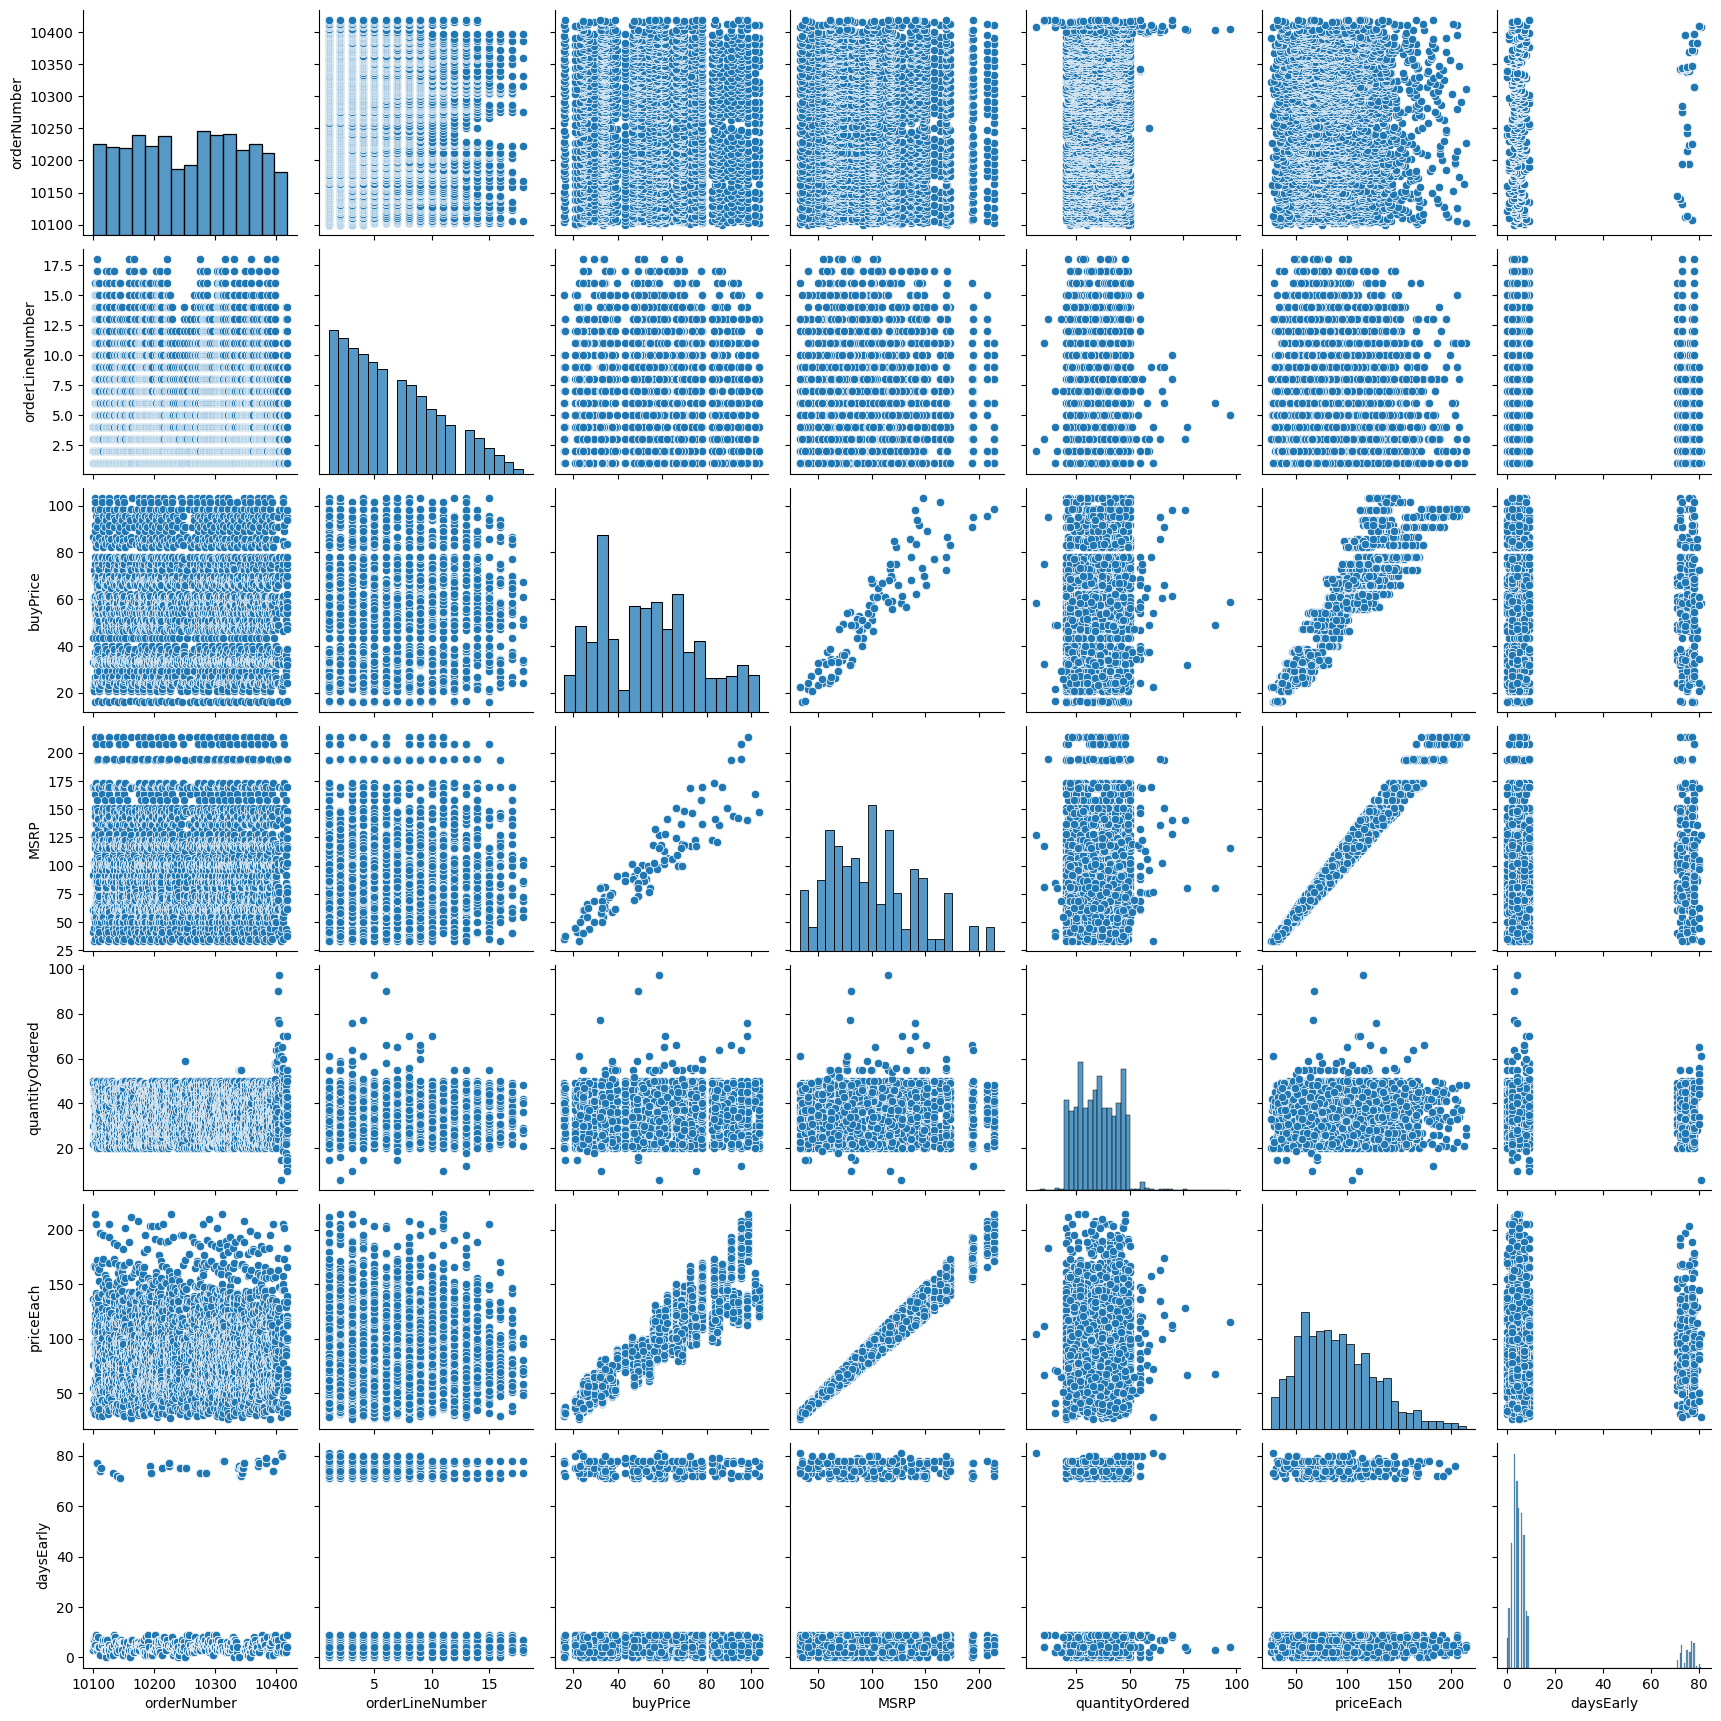

In [14]:
# Pairwise distributions
sns.pairplot(df)

# Show figure
plt.show()

#### Correlation Map

<ipython-input-15-851c356ee020>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='bwr', annot=True, fmt = ".2f")


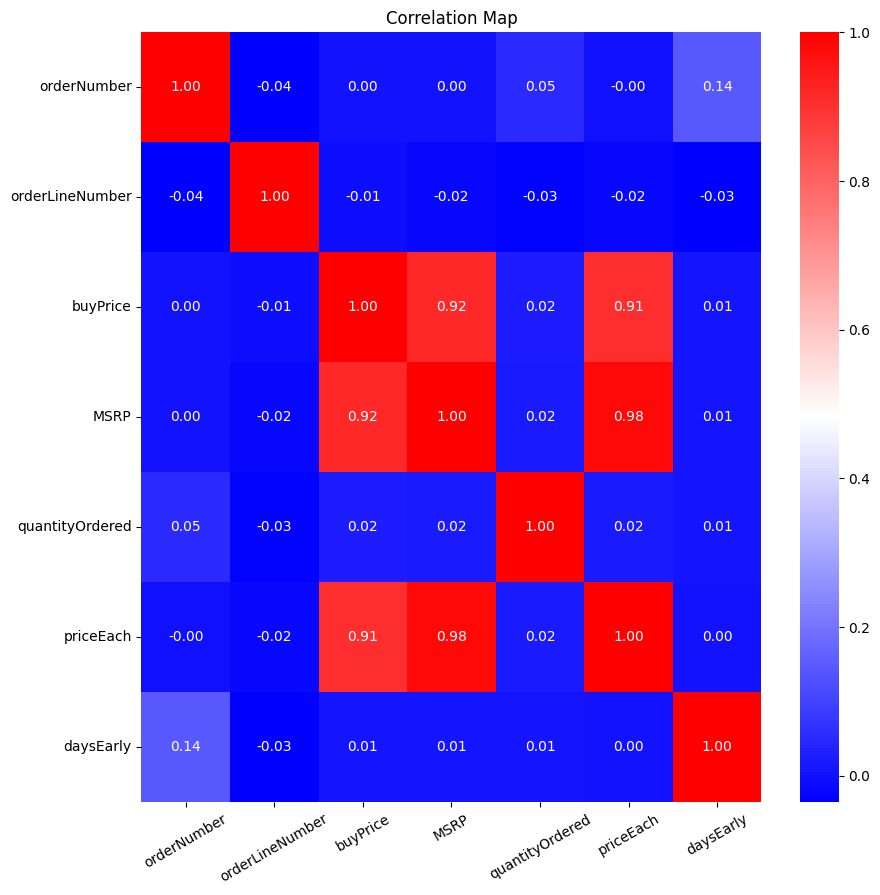

In [15]:
# Define correlation map figure
plt.figure(figsize=(10,10))

# Correlation Map
sns.heatmap(df.corr(), cmap='bwr', annot=True, fmt = ".2f")
# Adjust axes labels
plt.xticks(rotation=30)
plt.yticks(rotation=0)
# Plot title
plt.title('Correlation Map')

# Show figure
plt.show()

#### Quantity Distribution

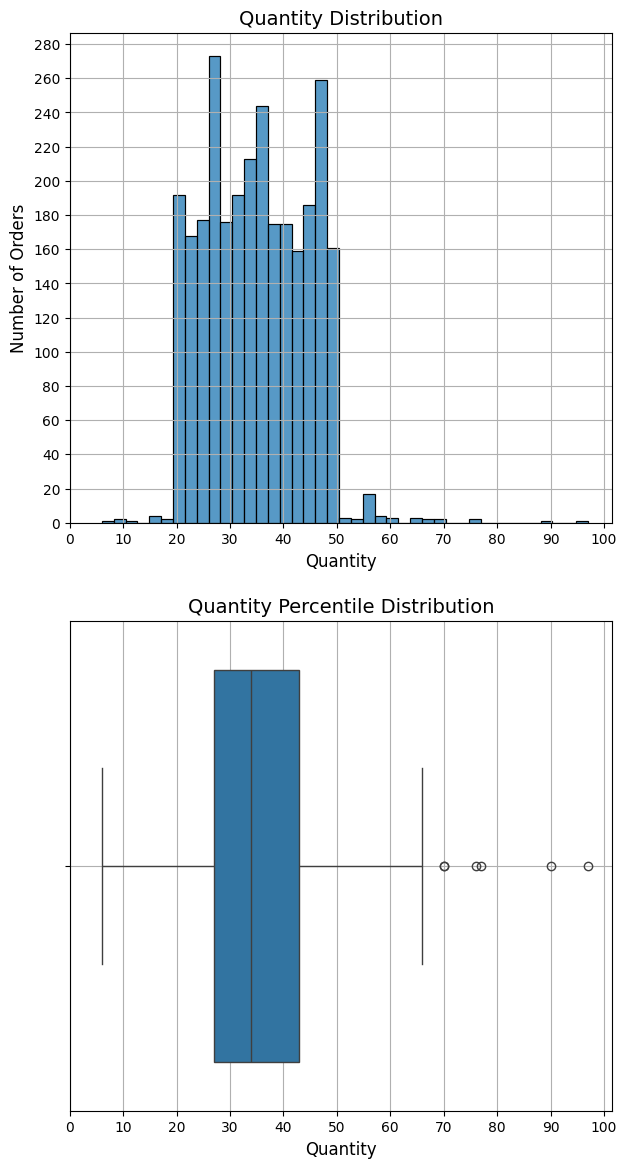

In [16]:
# Define figure
quantity_hist = plt.figure(figsize=(7, 14))

# Quantity Histogram
ax1 = quantity_hist.add_subplot(2, 1, 1)
ax1 = sns.histplot(df['quantityOrdered'])
# Adjust X and Y-Axis ranges
plt.xticks(np.arange(0, 110, 10))
plt.yticks(np.arange(0, 300, 20))
# Plot title and labels
plt.xlabel('Quantity', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.title('Quantity Distribution', fontsize=14)
# Plot grid
plt.grid(True)

# Box Plot
ax2 = quantity_hist.add_subplot(2, 1, 2)
ax2 = sns.boxplot(x=df['quantityOrdered'])
# Adjust X-Axis range
plt.xticks(np.arange(0, 110, 10))
# Plot title and X-Axis label
plt.xlabel('Quantity', fontsize=12)
plt.title('Quantity Percentile Distribution', fontsize=14)
# Plot grid
plt.grid(True)

# Show figure
plt.show()

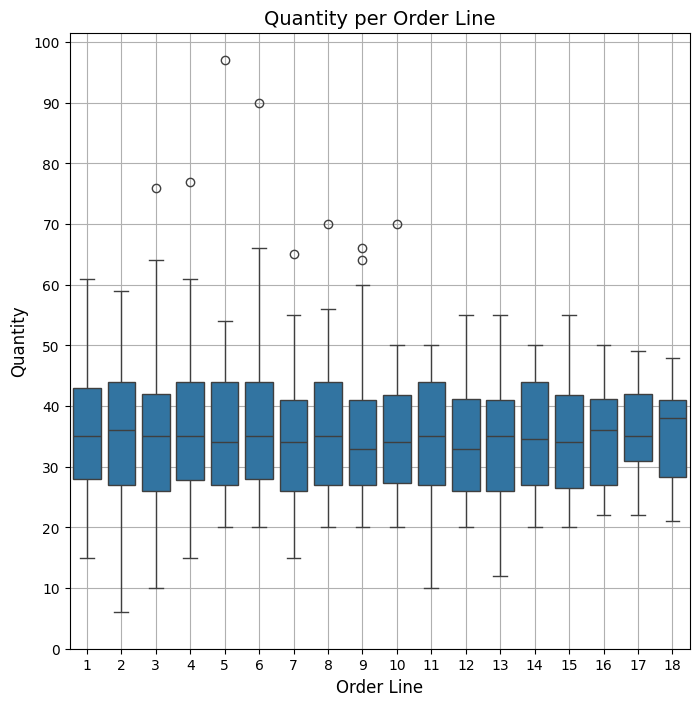

In [17]:
# Define figure
quantity_line_num = plt.figure(figsize=(8, 8))

# Quantity per Line Number
quantity_line_num = sns.boxplot(x=df['orderLineNumber'], y=df['quantityOrdered'])
# Adjust X-Axis range
plt.yticks(np.arange(0, 110, 10))
# Plot title and labels
plt.xlabel('Order Line', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.title('Quantity per Order Line', fontsize=14)
# Plot grid
plt.grid(True)

# Show figure
plt.show()

#### Buy Price Distribution

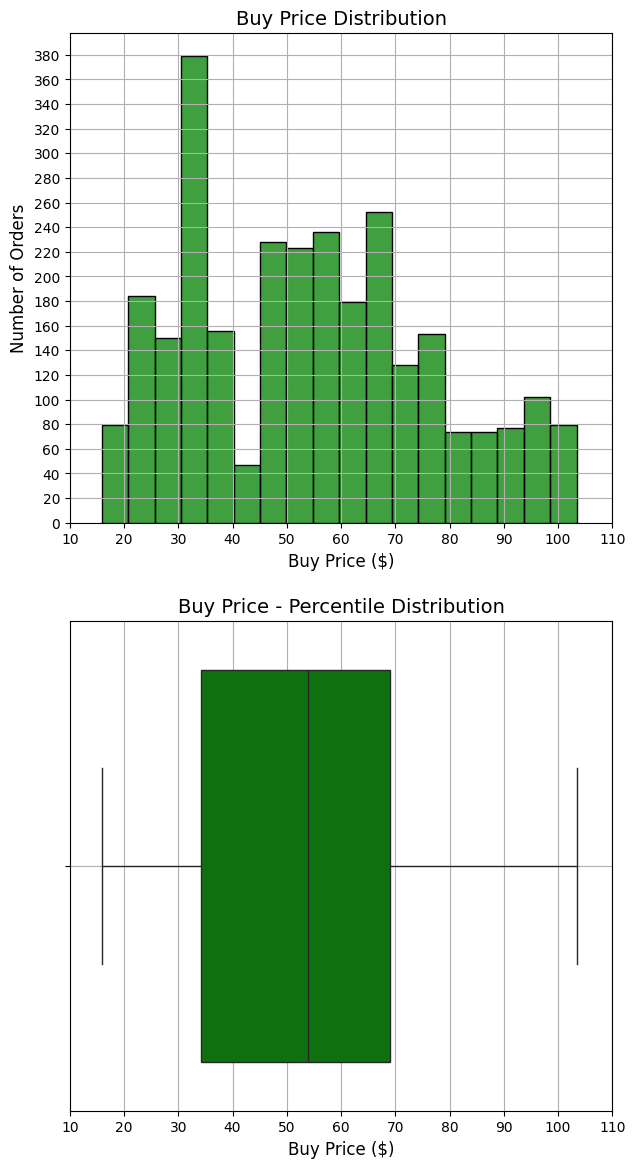

In [18]:
# Define figure
bp_hist = plt.figure(figsize=(7, 14))

# Buy Price histogram
ax1 = bp_hist.add_subplot(2, 1, 1)
ax1 = sns.histplot(df['buyPrice'], color='green')
# Adjust X and Y-Axis ranges
plt.xticks(np.arange(10, 120, 10))
plt.yticks(np.arange(0, 400, 20))
# Plot title and labels
plt.xlabel('Buy Price ($)', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.title('Buy Price Distribution', fontsize=14)
# Plot grid
plt.grid(True)

# Box Plot
ax2 = bp_hist.add_subplot(2, 1, 2)
ax2 = sns.boxplot(x=df['buyPrice'], color='green')
# Adjust X-Axis range
plt.xticks(np.arange(10, 120, 10))
# Plot title and X-Axis label
plt.xlabel('Buy Price ($)', fontsize=12)
plt.title('Buy Price - Percentile Distribution', fontsize=14)
# Plot grid
plt.grid(True)

# Show figure
plt.show()

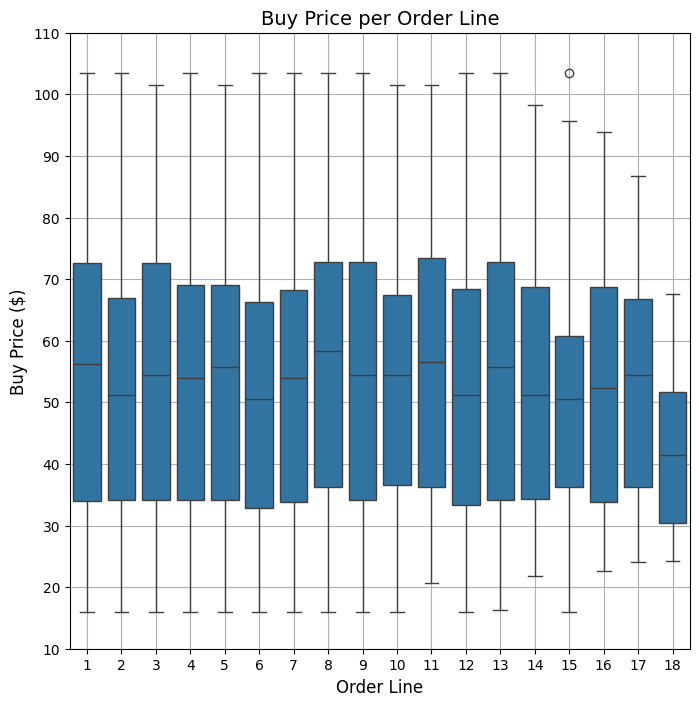

In [19]:
# Define figure
bp_line_num = plt.figure(figsize=(8, 8))

# Buy Price per Line Number
bp_line_num = sns.boxplot(x=df['orderLineNumber'], y=df['buyPrice'])
# Adjust X-Axis range
plt.yticks(np.arange(10, 120, 10))
# Plot title and labels
plt.xlabel('Order Line', fontsize=12)
plt.ylabel('Buy Price ($)', fontsize=12)
plt.title('Buy Price per Order Line', fontsize=14)
# Plot grid
plt.grid(True)

# Show figure
plt.show()

#### MSRP Distribution

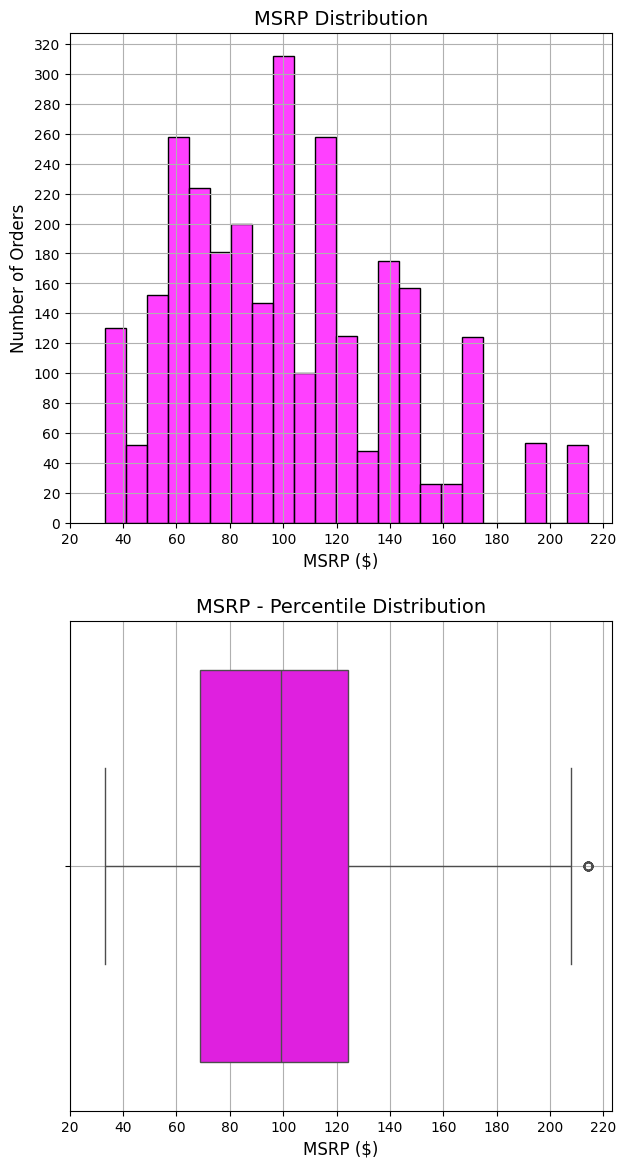

In [20]:
# Define figure
msrp_hist = plt.figure(figsize=(7, 14))

# Buy Price histogram
ax1 = msrp_hist.add_subplot(2, 1, 1)
ax1 = sns.histplot(df['MSRP'], color='magenta')
# Adjust X and Y-Axis ranges
plt.xticks(np.arange(20, 240, 20))
plt.yticks(np.arange(0, 340, 20))
# Plot title and labels
plt.xlabel('MSRP ($)', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.title('MSRP Distribution', fontsize=14)
# Plot grid
plt.grid(True)

# Box Plot
ax2 = msrp_hist.add_subplot(2, 1, 2)
ax2 = sns.boxplot(x=df['MSRP'], color='magenta')
# Adjust X-Axis range
plt.xticks(np.arange(20, 240, 20))
# Plot title and X-Axis label
plt.xlabel('MSRP ($)', fontsize=12)
plt.title('MSRP - Percentile Distribution', fontsize=14)
# Plot grid
plt.grid(True)

# Show figure
plt.show()

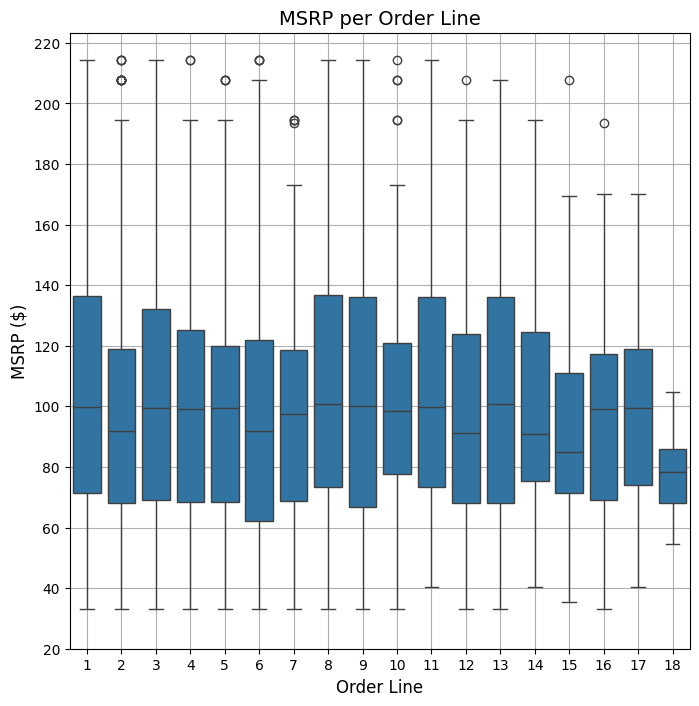

In [21]:
# Define figure
msrp_line_num = plt.figure(figsize=(8, 8))

# MSRP per Line Number
msrp_line_num = sns.boxplot(x=df['orderLineNumber'], y=df['MSRP'])
# Adjust X-Axis range
plt.yticks(np.arange(20, 240, 20))
# Plot title and labels
plt.xlabel('Order Line', fontsize=12)
plt.ylabel('MSRP ($)', fontsize=12)
plt.title('MSRP per Order Line', fontsize=14)
# Plot grid
plt.grid(True)

# Show figure
plt.show()

#### Order Price

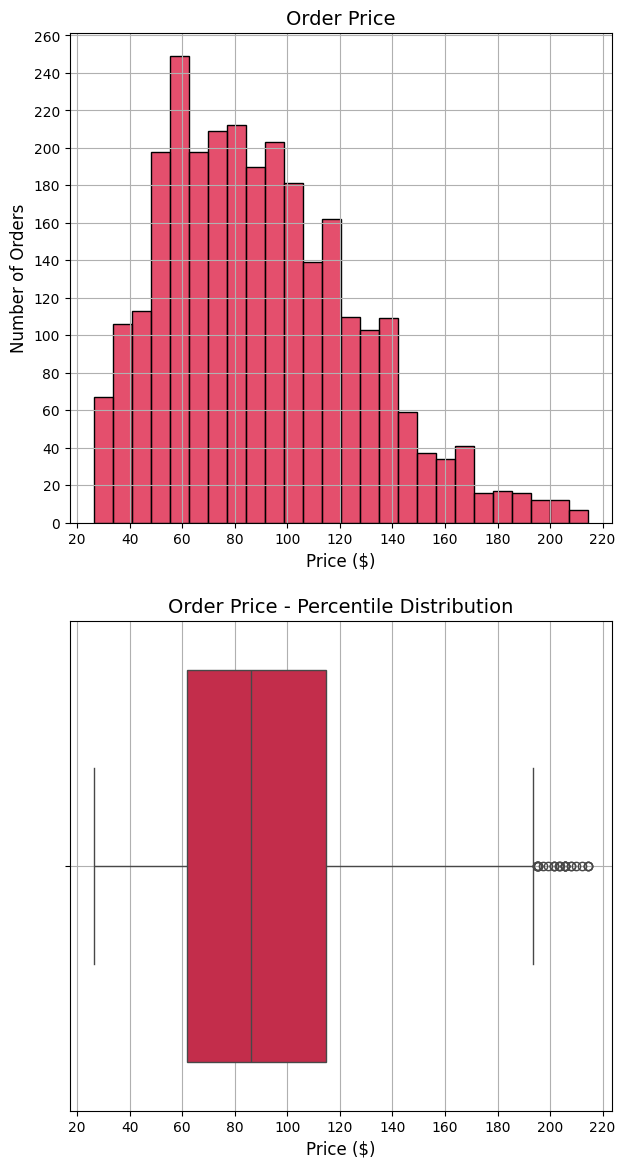

In [22]:
# Define figure
order_price_hist = plt.figure(figsize=(7, 14))

# Buy Price histogram
ax1 = order_price_hist.add_subplot(2, 1, 1)
ax1 = sns.histplot(df['priceEach'], color='crimson')
# Adjust X and Y-Axis ranges
plt.xticks(np.arange(20, 240, 20))
plt.yticks(np.arange(0, 280, 20))
# Plot title and labels
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.title('Order Price', fontsize=14)
# Plot grid
plt.grid(True)

# Box Plot
ax2 = order_price_hist.add_subplot(2, 1, 2)
ax2 = sns.boxplot(x=df['priceEach'], color='crimson')
# Adjust X-Axis range
plt.xticks(np.arange(20, 240, 20))
# Plot title and X-Axis label
plt.xlabel('Price ($)', fontsize=12)
plt.title('Order Price - Percentile Distribution', fontsize=14)
# Plot grid
plt.grid(True)

# Show figure
plt.show()

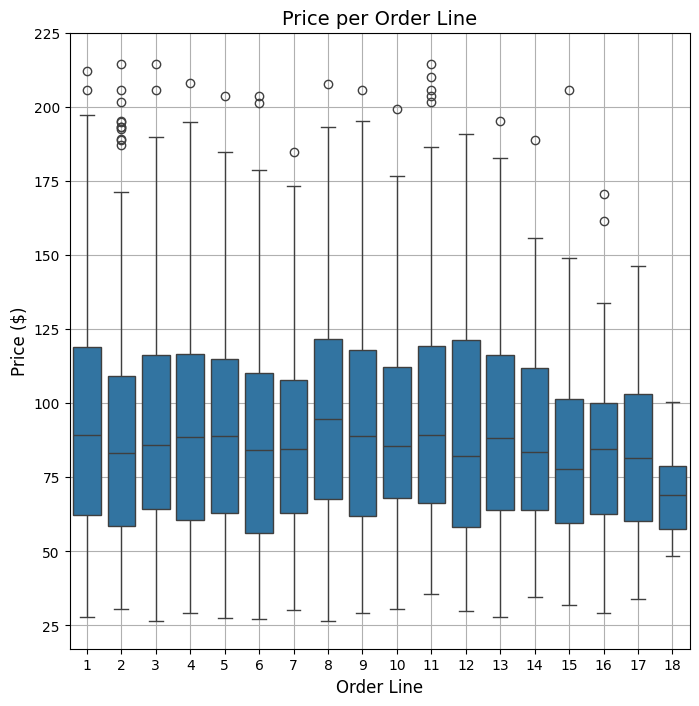

In [23]:
# Define figure
price_line_num = plt.figure(figsize=(8, 8))

# Order Price per Line Number
price_line_num = sns.boxplot(x=df['orderLineNumber'], y=df['priceEach'])
# Adjust X-Axis range
plt.yticks(np.arange(25, 250, 25))
# Plot title and labels
plt.xlabel('Order Line', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.title('Price per Order Line', fontsize=14)
# Plot grid
plt.grid(True)

# Show figure
plt.show()

#### Buy Price vs. MSRP

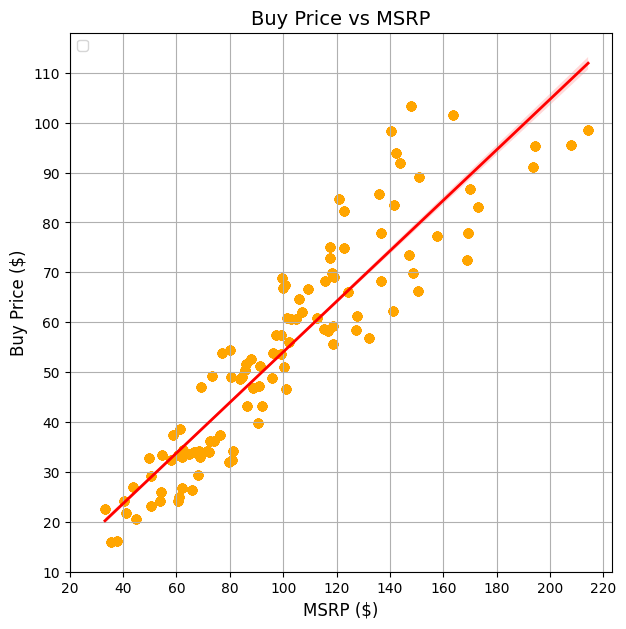

In [24]:
# Define figure
bp_msrp = plt.figure(figsize=(7,7))

# Order Price vs. MSRP
bp_msrp = sns.regplot(x=df['MSRP'], y=df['buyPrice'], color='orange',
                               line_kws={"lw": 2, "color": "red"})
# Adjust X and Y-Axes range
plt.xticks(np.arange(20, 240, 20))
plt.yticks(np.arange(10, 120, 10))
# Plot title and labels
plt.xlabel('MSRP ($)', fontsize=12)
plt.ylabel('Buy Price ($)', fontsize=12)
plt.title('Buy Price vs MSRP', fontsize=14)
# Plot legend and grid
plt.legend(loc='upper left')
plt.grid(True)

# Show figure
plt.show()

#### Order Price vs. Buy Price

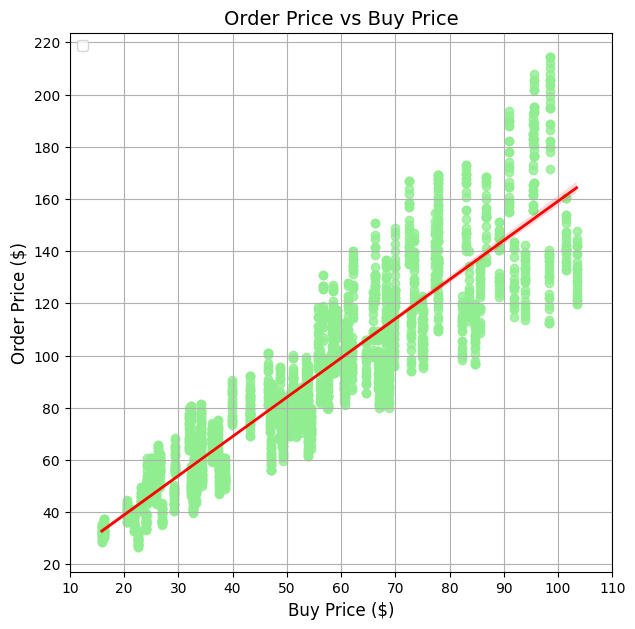

In [25]:
# Define figure
order_price_bp = plt.figure(figsize=(7,7))

# Order Price vs. MSRP
order_price_bp = sns.regplot(x=df['buyPrice'], y=df['priceEach'], color='lightgreen',
                               line_kws={"lw": 2, "color": "red"})
# Adjust X and Y-Axes range
plt.xticks(np.arange(10, 120, 10))
plt.yticks(np.arange(20, 240, 20))
# Plot title and labels
plt.xlabel('Buy Price ($)', fontsize=12)
plt.ylabel('Order Price ($)', fontsize=12)
plt.title('Order Price vs Buy Price', fontsize=14)
# Plot legend and grid
plt.legend(loc='upper left')
plt.grid(True)

# Show figure
plt.show()

#### Order Price vs. MSRP

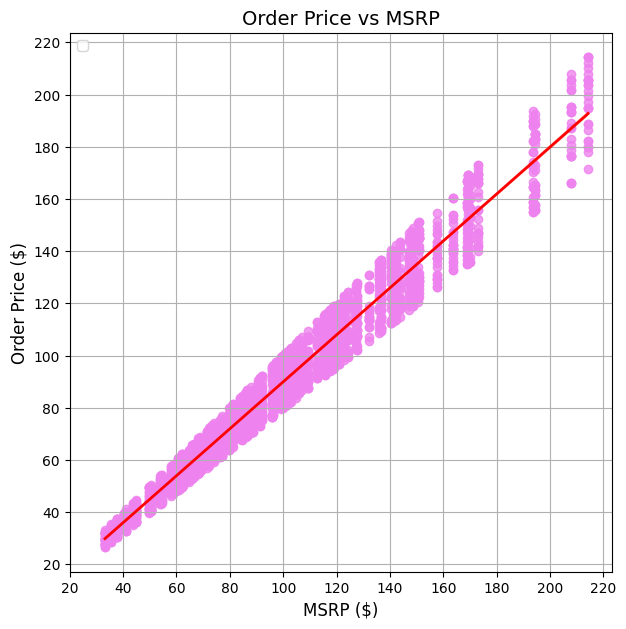

In [26]:
# Define figure
order_price_msrp = plt.figure(figsize=(7,7))

# Order Price vs. MSRP
order_price_msrp = sns.regplot(x=df['MSRP'], y=df['priceEach'], color='violet',
                               line_kws={"lw": 2, "color": "red"})
# Adjust X and Y-Axes range
plt.xticks(np.arange(20, 240, 20))
plt.yticks(np.arange(20, 240, 20))
# Plot title and labels
plt.xlabel('MSRP ($)', fontsize=12)
plt.ylabel('Order Price ($)', fontsize=12)
plt.title('Order Price vs MSRP', fontsize=14)
# Plot legend and grid
plt.legend(loc='upper left')
plt.grid(True)

# Show figure
plt.show()

#### Order Price vs. Quantity Ordered

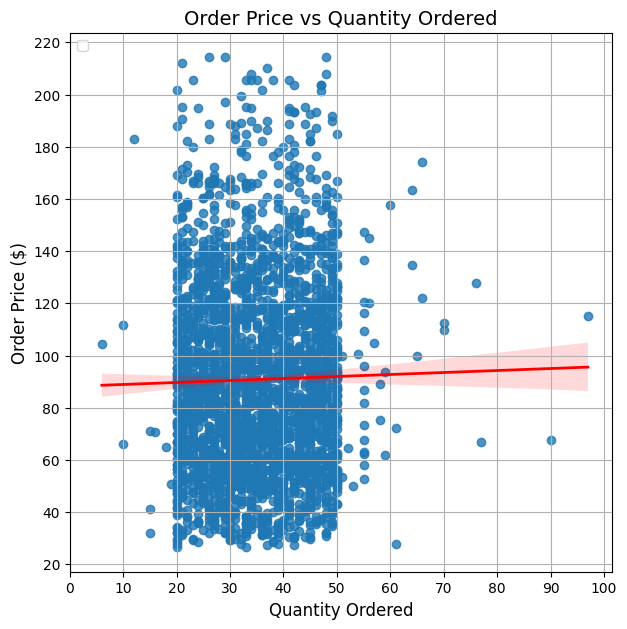

In [27]:
# Define figure
order_price_quantity = plt.figure(figsize=(7,7))

# Order Price vs. Quantity Ordered
order_price_quantity = sns.regplot(x=df['quantityOrdered'], y=df['priceEach'],
                               line_kws={"lw": 2, "color": "red"})
# Adjust X and Y-Axes range
plt.xticks(np.arange(0, 110, 10))
plt.yticks(np.arange(20, 240, 20))
# Plot title and labels
plt.xlabel('Quantity Ordered', fontsize=12)
plt.ylabel('Order Price ($)', fontsize=12)
plt.title('Order Price vs Quantity Ordered', fontsize=14)
# Plot legend and grid
plt.legend(loc='upper left')
plt.grid(True)

# Show figure
plt.show()

#### Buy Price vs. Quantity Ordered

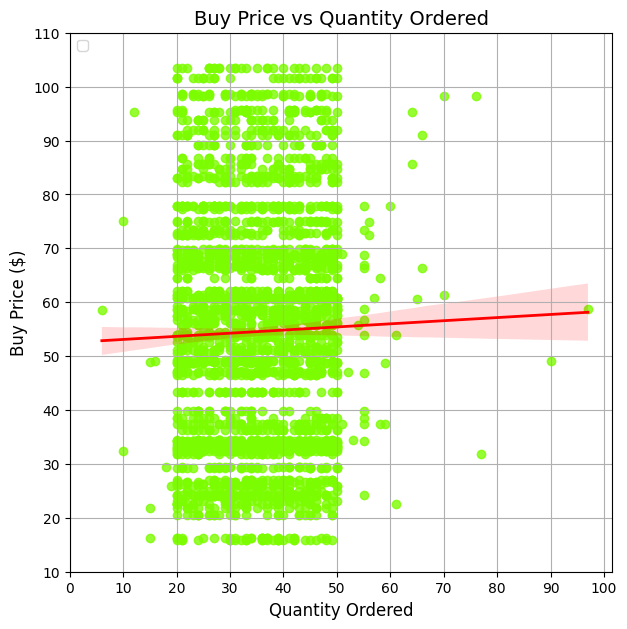

In [28]:
# Define figure
bp_quantity = plt.figure(figsize=(7,7))

# Buy Price vs. Quantity Ordered
bp_quantity = sns.regplot(x=df['quantityOrdered'], y=df['buyPrice'],
                             color='lawngreen', line_kws={"lw": 2, "color": "red"})
# Adjust X and Y-Axes range
plt.xticks(np.arange(0, 110, 10))
plt.yticks(np.arange(10, 120, 10))
# Plot title and labels
plt.xlabel('Quantity Ordered', fontsize=12)
plt.ylabel('Buy Price ($)', fontsize=12)
plt.title('Buy Price vs Quantity Ordered', fontsize=14)
# Plot legend and grid
plt.legend(loc='upper left')
plt.grid(True)

# Show figure
plt.show()

#### MSRP vs. Quantity Ordered

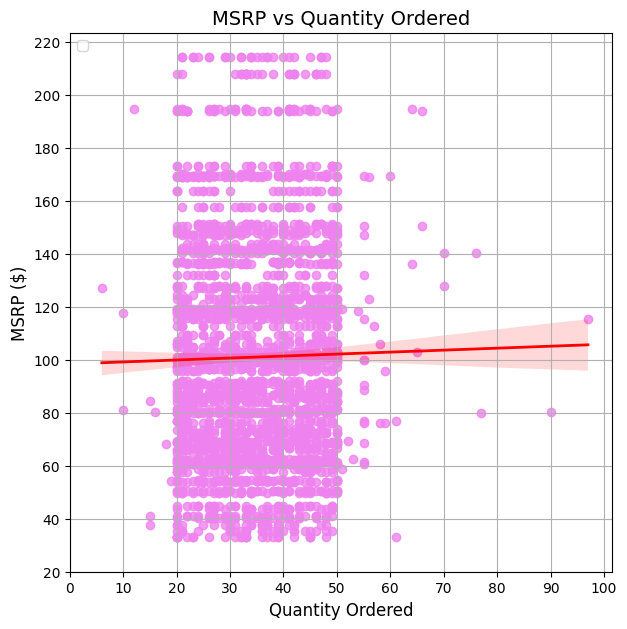

In [29]:
# Define figure
msrp_quantity = plt.figure(figsize=(7,7))

# MSRP vs. Quantity Ordered
msrp_quantity = sns.regplot(x=df['quantityOrdered'], y=df['MSRP'],
                             color='violet', line_kws={"lw": 2, "color": "red"})
# Adjust X and Y-Axes range
plt.xticks(np.arange(0, 110, 10))
plt.yticks(np.arange(20, 240, 20))
# Plot title and labels
plt.xlabel('Quantity Ordered', fontsize=12)
plt.ylabel('MSRP ($)', fontsize=12)
plt.title('MSRP vs Quantity Ordered', fontsize=14)
# Plot legend and grid
plt.legend(loc='upper left')
plt.grid(True)

# Show figure
plt.show()

#### Days Early vs. Quantity Ordered

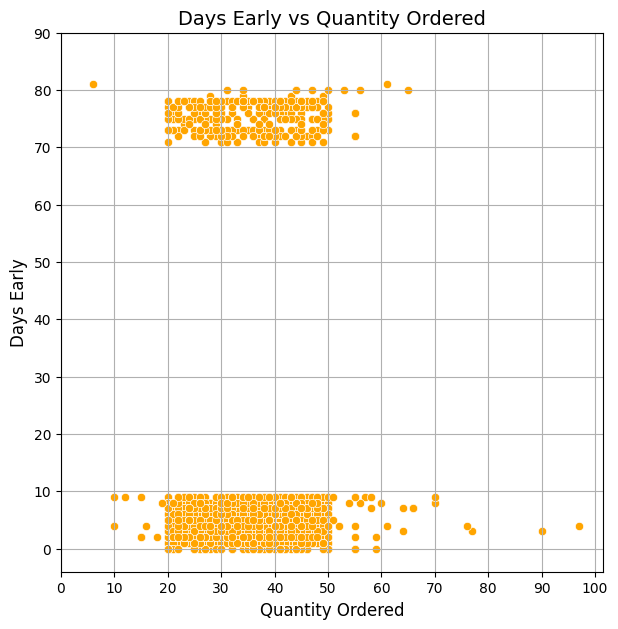

In [30]:
# Define figure
days_early_quantity = plt.figure(figsize=(7,7))

# Days Early vs. Quantity Ordered
days_early_quantity = sns.scatterplot(x=df['quantityOrdered'], y=df['daysEarly'],
                             color='orange')
# Adjust X and Y-Axes range
plt.xticks(np.arange(0, 110, 10))
plt.yticks(np.arange(0, 100, 10))
# Plot title and labels
plt.xlabel('Quantity Ordered', fontsize=12)
plt.ylabel('Days Early', fontsize=12)
plt.title('Days Early vs Quantity Ordered', fontsize=14)
# Plot grid
plt.grid(True)

# Show figure
plt.show()

### 2.4. Feature Engineering

In [31]:
# # Label Encode the Spatial Distribution column
le = LabelEncoder()
X[:, 6] = le.fit_transform(X[:, 6])

X

array([[10100, 3, 86.7, ..., 136.0, 1, 3],
       [10100, 2, 33.3, ..., 55.09, 1, 3],
       [10100, 4, 43.26, ..., 75.46, 1, 3],
       ...,
       [10419, 7, 16.24, ..., 32.1, 1, 9],
       [10419, 12, 38.58, ..., 52.66, 1, 9],
       [10419, 8, 98.3, ..., 112.34, 1, 9]], dtype=object)

## 3. Apply K-Means Clustering

In [32]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

### 3.1. Find the optimal number of categories (clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

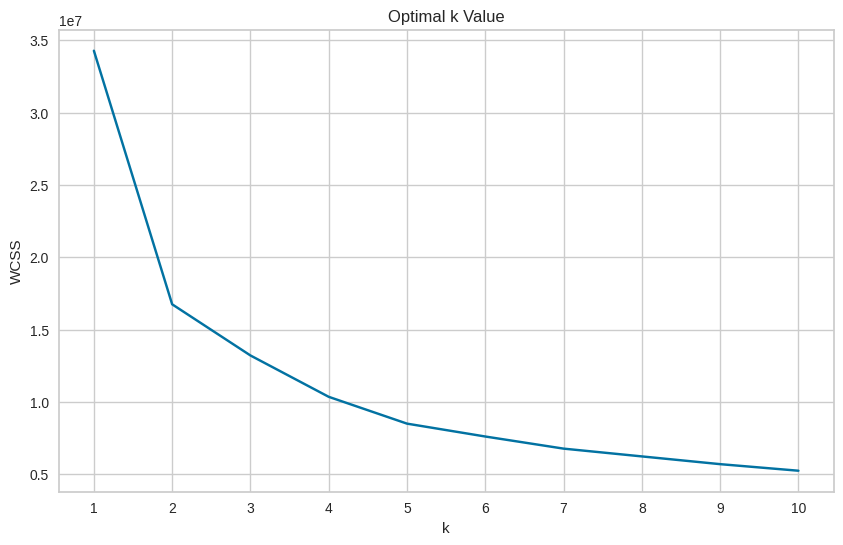

In [33]:
# Using the "Elbow Method" - WCSS
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

# Define figure
optimal_k = plt.figure(figsize=(10,6))
# Plot results
optimal_k = plt.plot(range(1, 11), wcss, 'bx-')
# Adjust X-Axis range
plt.xticks(np.arange(1, 11, 1))
# Plot title and labels
plt.xlabel('k')
plt.ylabel('WCSS')
plt.title('Optimal k Value')
# Show grid
plt.grid(True)

# Show plot
plt.show()

##### **Number of clusters:**

In [34]:
# Set number of clusters as per "Elbow Method" above
clusters = 4

### 3.2. Define Model

In [35]:
# Define K-Means model
kmeans = KMeans(n_clusters=clusters, init='k-means++', algorithm='lloyd',
                random_state=42)
# Train K-Means model
y_kmeans = kmeans.fit_predict(X)

print(y_kmeans)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 0 0 ... 3 3 1]


In [36]:
print(kmeans.inertia_)          # K-Means inertia
print(kmeans.cluster_centers_)  # Centroids of each cluster
print(kmeans.n_iter_)           # Number of iterations

10348059.879009262
[[1.01736585e+04 6.53610771e+00 4.05652264e+01 7.46148837e+01
  3.45728274e+01 6.70522644e+01 9.95104039e-01 8.58017136e+00]
 [1.03351026e+04 6.23826087e+00 7.61368348e+01 1.41212887e+02
  3.54382609e+01 1.27255513e+02 9.84347826e-01 1.45408696e+01]
 [1.01760206e+04 6.28142589e+00 7.62569981e+01 1.42201632e+02
  3.52251407e+01 1.28204034e+02 9.92495310e-01 1.04934334e+01]
 [1.03313771e+04 6.50285714e+00 4.01850171e+01 7.41137829e+01
  3.51234286e+01 6.63101486e+01 9.65714286e-01 1.49028571e+01]]
23


## 4. Visualize Results

##### **Colours for each cluster:**

- **Cluster 1** - Red
- **Cluster 2** - Blue
- **Cluster 3** - Green
- **Cluster 4** - Magenta

####**Category Indices (df index):**

- **0** - Order Number (0)
- **1** - Order Line Number (1)
- **2** - Buy Price (6)
- **3** - MSRP (7)
- **4** - Quantity Ordered (8)
- **5** - Price Each (9)
- **6** - Order Status (13)
- **7** - Days Early (14)

#### Buy Price vs MSRP

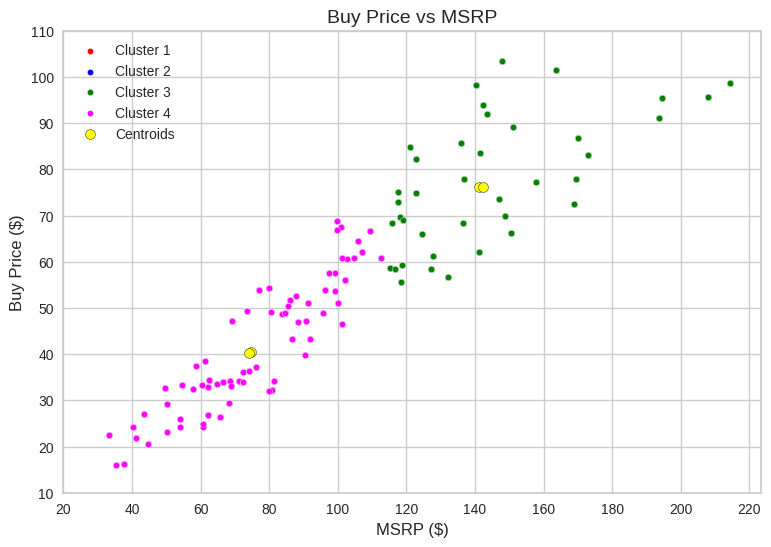

In [37]:
# Define figure
fig1_2 = plt.figure(figsize=(9, 6))

# Plot each cluster
fig1_2 = plt.scatter(X[y_kmeans == 0, 3], X[y_kmeans == 0, 2], s=20, c='red',
            label='Cluster 1', edgecolor='whitesmoke')
fig1_2 = plt.scatter(X[y_kmeans == 1, 3], X[y_kmeans == 1, 2], s=20, c='blue',
            label='Cluster 2', edgecolor='whitesmoke')
fig1_2 = plt.scatter(X[y_kmeans == 2, 3], X[y_kmeans == 2, 2], s=20, c='green',
            label='Cluster 3', edgecolor='whitesmoke')
fig1_2 = plt.scatter(X[y_kmeans == 3, 3], X[y_kmeans == 3, 2], s=20, c='magenta',
            label='Cluster 4', edgecolor='whitesmoke')
# Plot centroids
fig1_2 = plt.scatter(kmeans.cluster_centers_[:, 3], kmeans.cluster_centers_[:, 2], s=50,
            c='yellow', label='Centroids', edgecolor='black')

# Adjust X and Y-Axes range
plt.xticks(np.arange(20, 240, 20))
plt.yticks(np.arange(10, 120, 10))
# Plot title and labels
plt.xlabel('MSRP ($)', fontsize=12)
plt.ylabel('Buy Price ($)', fontsize=12)
plt.title('Buy Price vs MSRP', fontsize=14)
# Plot legend and grid
plt.legend(loc='upper left')
plt.grid(True)

# Show plot
plt.show()

#### Order Price vs Buy Price

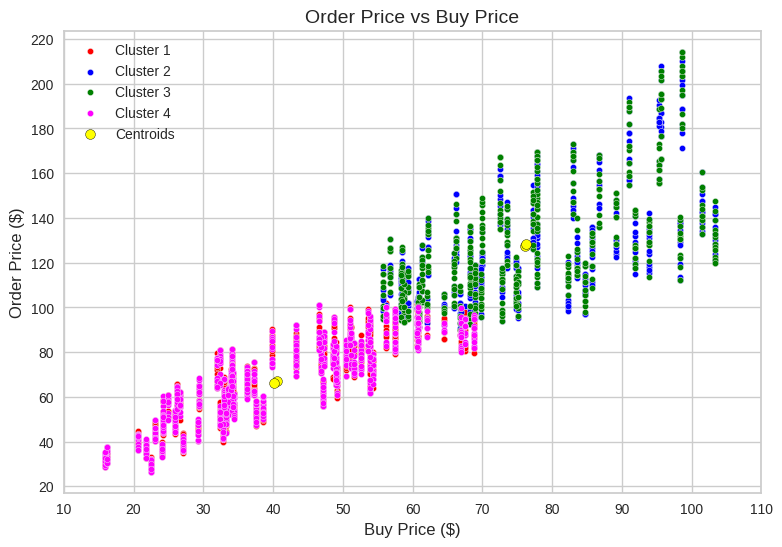

In [38]:
# Define figure
fig2_2 = plt.figure(figsize=(9, 6))

# Plot each cluster
fig2_2 = plt.scatter(X[y_kmeans == 0, 2], X[y_kmeans == 0, 5], s=20, c='red',
            label='Cluster 1', edgecolor='whitesmoke')
fig2_2 = plt.scatter(X[y_kmeans == 1, 2], X[y_kmeans == 1, 5], s=20, c='blue',
            label='Cluster 2', edgecolor='whitesmoke')
fig2_2 = plt.scatter(X[y_kmeans == 2, 2], X[y_kmeans == 2, 5], s=20, c='green',
            label='Cluster 3', edgecolor='whitesmoke')
fig2_2 = plt.scatter(X[y_kmeans == 3, 2], X[y_kmeans == 3, 5], s=20, c='magenta',
            label='Cluster 4', edgecolor='whitesmoke')
# Plot centroids
fig2_2 = plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 5], s=50,
            c='yellow', label='Centroids', edgecolor='black')

# Adjust X and Y-Axes range
plt.xticks(np.arange(10, 120, 10))
plt.yticks(np.arange(20, 240, 20))
# Plot title and labels
plt.xlabel('Buy Price ($)', fontsize=12)
plt.ylabel('Order Price ($)', fontsize=12)
plt.title('Order Price vs Buy Price', fontsize=14)
# Plot legend and grid
plt.legend(loc='upper left')
plt.grid(True)

# Show plot
plt.show()

#### Order Price vs MSRP

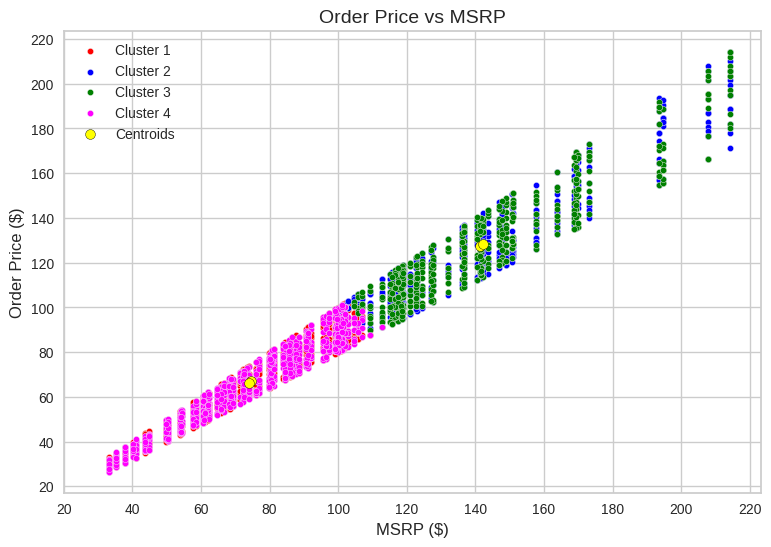

In [39]:
# Define figure
fig3_2 = plt.figure(figsize=(9, 6))

# Plot each cluster
fig3_2 = plt.scatter(X[y_kmeans == 0, 3], X[y_kmeans == 0, 5], s=20, c='red',
            label='Cluster 1', edgecolor='whitesmoke')
fig3_2 = plt.scatter(X[y_kmeans == 1, 3], X[y_kmeans == 1, 5], s=20, c='blue',
            label='Cluster 2', edgecolor='whitesmoke')
fig3_2 = plt.scatter(X[y_kmeans == 2, 3], X[y_kmeans == 2, 5], s=20, c='green',
            label='Cluster 3', edgecolor='whitesmoke')
fig3_2 = plt.scatter(X[y_kmeans == 3, 3], X[y_kmeans == 3, 5], s=20, c='magenta',
            label='Cluster 4', edgecolor='whitesmoke')
# Plot centroids
fig3_2 = plt.scatter(kmeans.cluster_centers_[:, 3], kmeans.cluster_centers_[:, 5], s=50,
            c='yellow', label='Centroids', edgecolor='black')

# Adjust X and Y-Axes range
plt.xticks(np.arange(20, 240, 20))
plt.yticks(np.arange(20, 240, 20))
# Plot title and labels
plt.xlabel('MSRP ($)', fontsize=12)
plt.ylabel('Order Price ($)', fontsize=12)
plt.title('Order Price vs MSRP', fontsize=14)
# Plot legend and grid
plt.legend(loc='upper left')
plt.grid(True)

# Show plot
plt.show()

#### Order Price vs Quantity Ordered

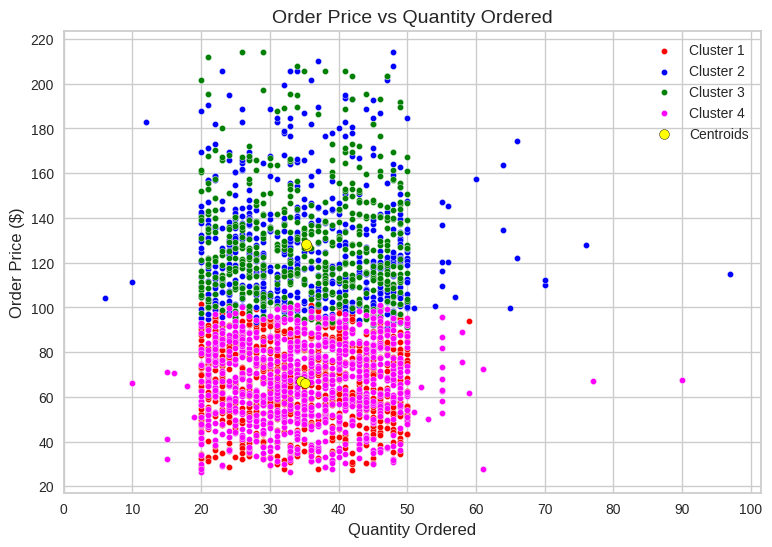

In [40]:
# Define figure
fig4_2 = plt.figure(figsize=(9, 6))

# Plot each cluster
fig4_2 = plt.scatter(X[y_kmeans == 0, 4], X[y_kmeans == 0, 5], s=20, c='red',
            label='Cluster 1', edgecolor='whitesmoke')
fig4_2 = plt.scatter(X[y_kmeans == 1, 4], X[y_kmeans == 1, 5], s=20, c='blue',
            label='Cluster 2', edgecolor='whitesmoke')
fig4_2 = plt.scatter(X[y_kmeans == 2, 4], X[y_kmeans == 2, 5], s=20, c='green',
            label='Cluster 3', edgecolor='whitesmoke')
fig4_2 = plt.scatter(X[y_kmeans == 3, 4], X[y_kmeans == 3, 5], s=20, c='magenta',
            label='Cluster 4', edgecolor='whitesmoke')
# Plot centroids
fig4_2 = plt.scatter(kmeans.cluster_centers_[:, 4], kmeans.cluster_centers_[:, 5], s=50,
            c='yellow', label='Centroids', edgecolor='black')

# Adjust X and Y-Axes range
plt.xticks(np.arange(0, 110, 10))
plt.yticks(np.arange(20, 240, 20))
# Plot title and labels
plt.xlabel('Quantity Ordered', fontsize=12)
plt.ylabel('Order Price ($)', fontsize=12)
plt.title('Order Price vs Quantity Ordered', fontsize=14)
# Plot legend and grid
plt.legend(loc='upper right')
plt.grid(True)

# Show figure
plt.show()

#### Buy Price vs Quantity Ordered

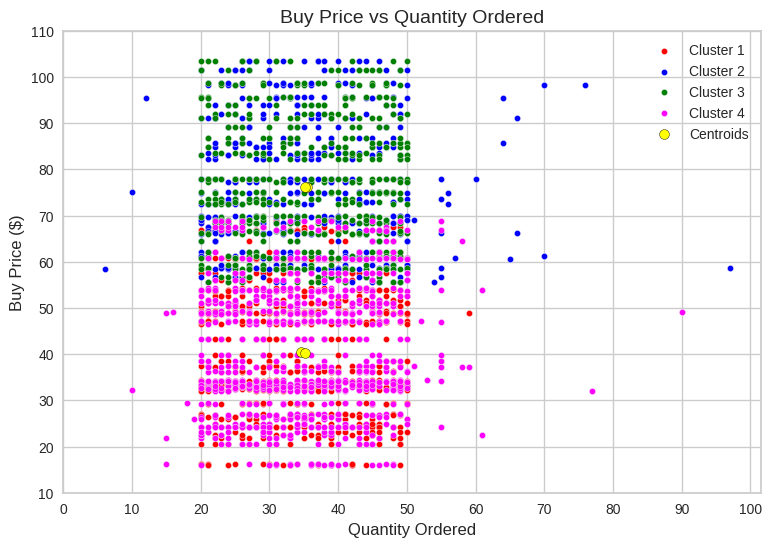

In [41]:
# Define figure
fig5_2 = plt.figure(figsize=(9, 6))

# Plot each cluster
fig5_2 = plt.scatter(X[y_kmeans == 0, 4], X[y_kmeans == 0, 2], s=20, c='red',
            label='Cluster 1', edgecolor='whitesmoke')
fig5_2 = plt.scatter(X[y_kmeans == 1, 4], X[y_kmeans == 1, 2], s=20, c='blue',
            label='Cluster 2', edgecolor='whitesmoke')
fig5_2 = plt.scatter(X[y_kmeans == 2, 4], X[y_kmeans == 2, 2], s=20, c='green',
            label='Cluster 3', edgecolor='whitesmoke')
fig5_2 = plt.scatter(X[y_kmeans == 3, 4], X[y_kmeans == 3, 2], s=20, c='magenta',
            label='Cluster 4', edgecolor='whitesmoke')
# Plot centroids
fig5_2 = plt.scatter(kmeans.cluster_centers_[:, 4], kmeans.cluster_centers_[:, 2], s=50,
            c='yellow', label='Centroids', edgecolor='black')

# Adjust X and Y-Axes range
plt.xticks(np.arange(0, 110, 10))
plt.yticks(np.arange(10, 120, 10))
# Plot title and labels
plt.xlabel('Quantity Ordered', fontsize=12)
plt.ylabel('Buy Price ($)', fontsize=12)
plt.title('Buy Price vs Quantity Ordered', fontsize=14)
# Plot legend and grid
plt.legend(loc='upper right')
plt.grid(True)

# Show figure
plt.show()

#### MSRP vs Quantity Ordered

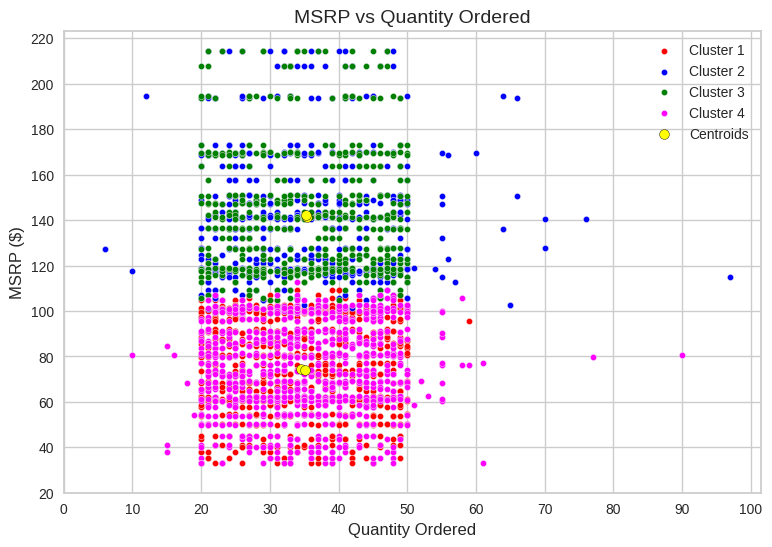

In [42]:
# Define figure
fig6_2 = plt.figure(figsize=(9, 6))

# Plot each cluster
fig6_2 = plt.scatter(X[y_kmeans == 0, 4], X[y_kmeans == 0, 3], s=20, c='red',
            label='Cluster 1', edgecolor='whitesmoke')
fig6_2 = plt.scatter(X[y_kmeans == 1, 4], X[y_kmeans == 1, 3], s=20, c='blue',
            label='Cluster 2', edgecolor='whitesmoke')
fig6_2 = plt.scatter(X[y_kmeans == 2, 4], X[y_kmeans == 2, 3], s=20, c='green',
            label='Cluster 3', edgecolor='whitesmoke')
fig6_2 = plt.scatter(X[y_kmeans == 3, 4], X[y_kmeans == 3, 3], s=20, c='magenta',
            label='Cluster 4', edgecolor='whitesmoke')
# Plot centroids
fig6_2 = plt.scatter(kmeans.cluster_centers_[:, 4], kmeans.cluster_centers_[:, 3], s=50,
            c='yellow', label='Centroids', edgecolor='black')

# Adjust X and Y-Axes range
plt.xticks(np.arange(0, 110, 10))
plt.yticks(np.arange(20, 240, 20))
# Plot title and labels
plt.xlabel('Quantity Ordered', fontsize=12)
plt.ylabel('MSRP ($)', fontsize=12)
plt.title('MSRP vs Quantity Ordered', fontsize=14)
# Plot legend and grid
plt.legend(loc='upper right')
plt.grid(True)

# Show figure
plt.show()